# Algorithme min-max

## Implémentation

In [18]:
def minmax(s, h, v, p, joueur):
    succ = [minmax(s, h, w, p - 1, 1 - joueur) for w in s(v, joueur)]
    if succ == [] or p == 0:
        return h(v)
    if joueur == 0:
        return max(succ)
    else:
        return min(succ)

## Application au jeu du domineering

<center><img src=https://raw.githubusercontent.com/fortierq/tikz-pdf/main/jeux/domineering/arbre/arbre.png width=700></center>

In [19]:
import numpy as np

v = -np.ones((4, 4))
v[0][1] = v[1][1] = 0
v[1][2] = v[1][3] = v[2][0] = v[2][1] = 1
v # représentation du plateau initial

array([[-1.,  0., -1., -1.],
       [-1.,  0.,  1.,  1.],
       [ 1.,  1., -1., -1.],
       [-1., -1., -1., -1.]])

### Heuristique

In [20]:
def h(v):
    n0, n1 = 0, 0 # nombre de possibilités pour les deux joueurs
    for i in range(len(v)):
        for j in range(len(v[0])):
            if i + 1 < len(v) and v[i][j] == v[i + 1][j] == -1:
                n0 += 1
            if j + 1 < len(v[0]) and v[i][j] == v[i][j + 1] == -1:
                n1 += 1
    if n0 == 0:
        return -float('inf')
    if n1 == 0:
        return float('inf')
    return n0 - n1

h(v) # test

-2

### Successeurs

In [22]:
import copy

def s(v, joueur):
    succ = []
    for i in range(4):
        for j in range(4):
            if v[i][j] == -1:
                w = copy.deepcopy(v)
                if joueur == 0 and i < 3 and v[i + 1][j] == -1:
                    w[i][j] = w[i + 1][j] = joueur
                    succ.append(w)
                if joueur == 1 and j < 3 and v[i][j + 1] == -1:
                    w[i][j] = w[i][j + 1] = joueur
                    succ.append(w)
    return succ

In [23]:
s(v, 0)

[array([[ 0.,  0., -1., -1.],
        [ 0.,  0.,  1.,  1.],
        [ 1.,  1., -1., -1.],
        [-1., -1., -1., -1.]]),
 array([[-1.,  0., -1., -1.],
        [-1.,  0.,  1.,  1.],
        [ 1.,  1.,  0., -1.],
        [-1., -1.,  0., -1.]]),
 array([[-1.,  0., -1., -1.],
        [-1.,  0.,  1.,  1.],
        [ 1.,  1., -1.,  0.],
        [-1., -1., -1.,  0.]])]

### Test

In [24]:
minmax(s, h, v, 2, 0) # test

1

On retrouve donc bien le bon résultat :

<center><img src=https://raw.githubusercontent.com/fortierq/tikz-pdf/main/jeux/domineering/arbre/arbre2.png width=700></center>

## Calcul du coup suivant

In [25]:
def minmax(s, h, v, p, joueur): # renvoie (coup à jouer, valeur de la position v)
    succ = s(v, joueur)
    if succ == [] or p == 0:
        return v, h(v)
    if joueur == 0:
        hmax = None
        for u in succ:
            _, hu = minmax(s, h, u, p - 1, 1 - joueur)
            if hmax is None or hu > hmax:
                umax, hmax = u, hu
        return umax, hmax
    else:
        hmin = None
        for u in succ:
            _, hu = minmax(s, h, u, p - 1, 1 - joueur)
            if hmin is None or hu < hmin:
                umin, hmin = u, hu
        return umin, hmin

## Affichage des coups choisis par min-max

In [42]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def affiche(v):
    n = len(v)
    ax = plt.axes(xlim=(0, n), ylim=(0, n))
    ax.set_aspect('equal', 'box')
    plt.xticks(range(5))
    plt.yticks(range(5))
    plt.grid()
    for i in range(n):
        for j in range(n):
            if v[i][j] == 0:
                ax.add_patch(Rectangle((j, n - 1 - i), 1, 1, facecolor='red'))
            if v[i][j] == 1:
                ax.add_patch(Rectangle((j, n - 1 - i), 1, 1, facecolor='blue'))
    plt.show()

In [43]:
v

array([[-1.,  0., -1., -1.],
       [-1.,  0.,  1.,  1.],
       [ 1.,  1., -1., -1.],
       [-1., -1., -1., -1.]])

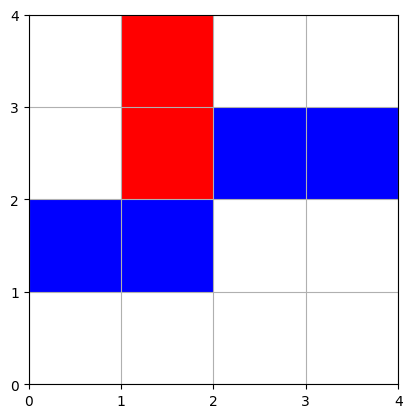

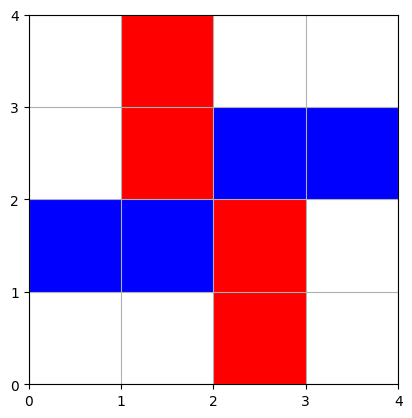

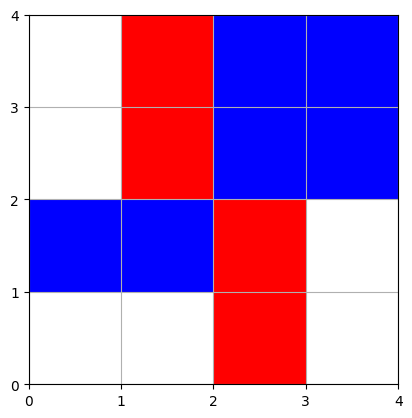

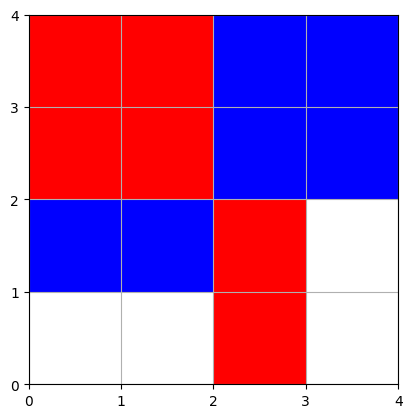

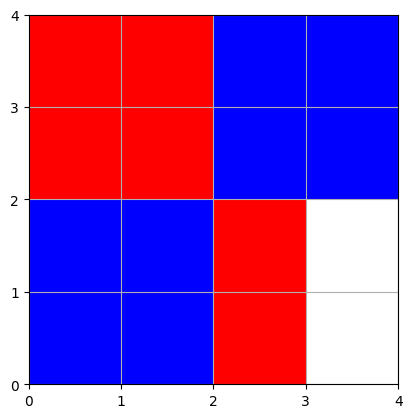

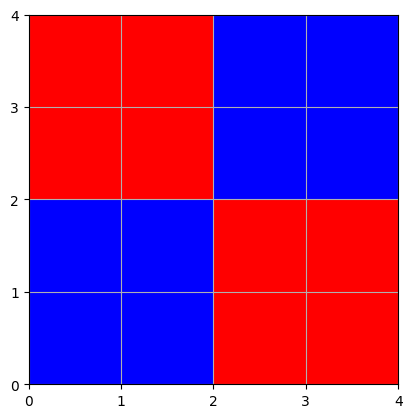

Joueur 0 a gagné


In [45]:
def jeu(s, h, v, p, joueur):
    affiche(v)
    if s(v, joueur) == []:
        print(f"Joueur {1 - joueur} a gagné")
        return
    u, hu = minmax(s, h, v, p, joueur)
    jeu(s, h, u, p, 1 - joueur)

# g = -np.ones((4, 4))
jeu(s, h, v, 3, 0)